In [19]:
#assignment statistical data visualization plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns
import os
%matplotlib inline


In [21]:
pwd 

'C:\\Users\\D\\Downloads'

In [22]:
source = pd.read_csv(r'C:\Users\D\Desktop\New Assignments  Keys\Datasets\Q1_a.csv')

In [23]:
df1 = source

In [24]:
df1.head()

,Index,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [25]:
df1['dist'].head()

0     2
1    10
2     4
3    22
4    16
Name: dist, dtype: int64

In [26]:
#for the calculations of mean,standard deviation
df1.describe()

,Index,speed,dist
count,50.00000,50.000000,50.000000
mean,25.50000,15.400000,42.980000
std,14.57738,5.287644,25.769377
min,1.00000,4.000000,2.000000
25%,13.25000,12.000000,26.000000
50%,25.50000,15.000000,36.000000
75%,37.75000,19.000000,56.000000
max,50.00000,25.000000,120.000000


In [27]:
#for the variance of speed
import statistics
statistics. pvariance(df1['speed'])



27.4

In [28]:
#for the median of speed
statistics.median(df1['speed'])

15.0

In [29]:
#for the median of dist
statistics.median(df1['dist'])

36.0

In [30]:
#for the variance of dist
statistics.pvariance(df1['dist'])

650.7796000000001

In [31]:
df1.isnull().sum()

Index    0
speed    0
dist     0
dtype: int64

In [32]:
%matplotlib inline

C:\Users\D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


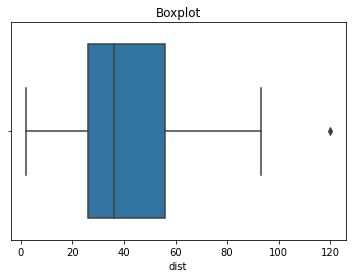

In [33]:
sns.boxplot(df1.dist);plt.title('Boxplot');plt.show()

In [34]:
IQR = df1['dist'].quantile(0.75) - df1['dist'].quantile(0.25) # IQR - Inter quartile range IQR = Q3-Q1
lower_limit = df1['dist'].quantile(0.25) - (IQR * 1.5) # Q1 - 1.5 * IQR
upper_limit = df1['dist'].quantile(0.75) + (IQR * 1.5) # Q3 + 1.5 * IQR

C:\Users\D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


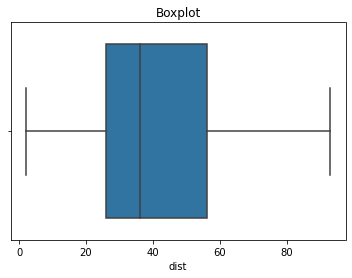

In [35]:
outliers_df1 = np.where(df1['dist'] > upper_limit,True,np.where(df1['dist'] < lower_limit,True,False))
# if value is greater than upper limit consider it as outliers and if the value is less than lower limit consider it as outliers
df1_trimmed = df1.loc[~(outliers_df1),] # ~ means not - it shows all false value (not outliers)
df1.shape, df1_trimmed.shape # we trim 12 outliers

sns.boxplot(df1_trimmed.dist);plt.title('Boxplot');plt.show()


<AxesSubplot:xlabel='speed'>

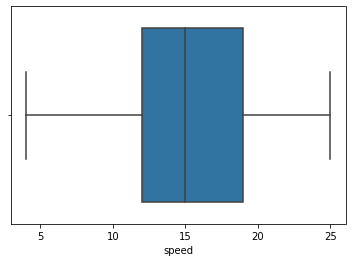

In [22]:
#for the detection of outliers
sns.boxplot(x = df1['speed'])

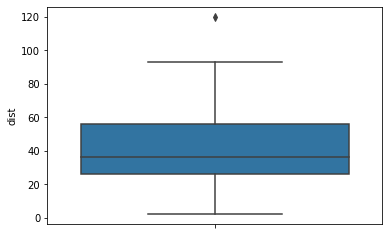

In [36]:
df_in = sns.boxplot(y = df1['dist']) 


In [37]:

def remove_outlier(df1):
    q1 = df1['dist'].quantile(0.25)
    q3 = df1['dist'].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df1.loc[(df1['dist'] > fence_low) & (df1['dist'] < fence_high)]
    return df_out

In [38]:
 outlier_removed = remove_outlier(df1)

In [39]:
print(df1['dist'])

0       2
1      10
2       4
3      22
4      16
5      10
6      18
7      26
8      34
9      17
10     28
11     14
12     20
13     24
14     28
15     26
16     34
17     34
18     46
19     26
20     36
21     60
22     80
23     20
24     26
25     54
26     32
27     40
28     32
29     40
30     50
31     42
32     56
33     76
34     84
35     36
36     46
37     68
38     32
39     48
40     52
41     56
42     64
43     66
44     54
45     70
46     92
47     93
48    120
49     85
Name: dist, dtype: int64


<AxesSubplot:ylabel='dist'>

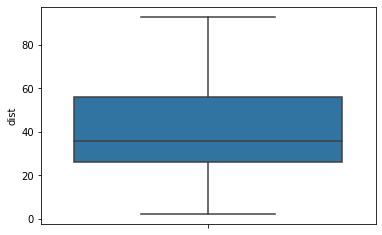

In [41]:
sns.boxplot(y = outlier_removed.dist)